In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

import matplotlib.pyplot as plt

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


In [18]:
class Sequentialmodel(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=2.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 

    
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) 
            print(torch.mean(a))
            print(1-torch.mean(torch.square(a)))
            
        a = self.linears[-1](a) 
         
        return a  

    def loss(self,x_train,u_train):
        return self.loss_function(self.forward(x_train),u_train)


In [19]:
x = torch.from_numpy(np.linspace(-1,1,100).reshape(-1,1)).float().to(device)
ub = np.array([1.0])
lb = np.array([-1.0])

layers = np.array([1,50,50,1]) #9 hidden layers

u_true = torch.sin(10*x)

u_pred = np.zeros((5,100)) 
u_x_pred = np.zeros((5,100))
u_xx_pred = np.zeros((5,100))



PINN = Sequentialmodel(layers)
PINN.to(device)

torch.manual_seed(1234)
        
PINN.forward(x).cpu().detach().numpy().reshape(-1,)


tensor(5.9605e-11, grad_fn=<MeanBackward0>)
tensor(0.9663, grad_fn=<RsubBackward1>)
tensor(-1.1921e-10, grad_fn=<MeanBackward0>)
tensor(0.9027, grad_fn=<RsubBackward1>)
tensor(5.0068e-10, grad_fn=<MeanBackward0>)
tensor(0.7711, grad_fn=<RsubBackward1>)


array([-1.2268077 , -1.1978041 , -1.1681916 , -1.1379701 , -1.1071401 ,
       -1.0757043 , -1.0436699 , -1.0110431 , -0.9778369 , -0.9440647 ,
       -0.9097454 , -0.87490195, -0.83956057, -0.80375385, -0.7675198 ,
       -0.730901  , -0.69394916, -0.6567217 , -0.61928284, -0.5817069 ,
       -0.5440753 , -0.50648046, -0.46902406, -0.43181726, -0.3949813 ,
       -0.3586497 , -0.32296413, -0.28807712, -0.2541518 , -0.22135583,
       -0.18986726, -0.15986535, -0.13153236, -0.10504874, -0.08058874,
       -0.05831707, -0.0383819 , -0.02091005, -0.0060014 ,  0.00627876,
        0.01590545,  0.02289793,  0.02732714,  0.02931669,  0.02904566,
        0.0267479 ,  0.0227094 ,  0.01726321,  0.0107809 ,  0.00366478,
       -0.00366475, -0.0107809 , -0.01726321, -0.0227094 , -0.0267479 ,
       -0.02904564, -0.02931669, -0.02732714, -0.02289793, -0.01590545,
       -0.00627876,  0.00600154,  0.02091005,  0.0383819 ,  0.05831707,
        0.08058874,  0.10504874,  0.13153215,  0.15986535,  0.18

tensor(-5.9605e-11, grad_fn=<MeanBackward0>)
tensor(0.9564, grad_fn=<RsubBackward1>)
tensor(-7.1526e-10, grad_fn=<MeanBackward0>)
tensor(0.9450, grad_fn=<RsubBackward1>)
tensor(-5.9605e-11, grad_fn=<MeanBackward0>)
tensor(0.9564, grad_fn=<RsubBackward1>)
tensor(-7.1526e-10, grad_fn=<MeanBackward0>)
tensor(0.9450, grad_fn=<RsubBackward1>)


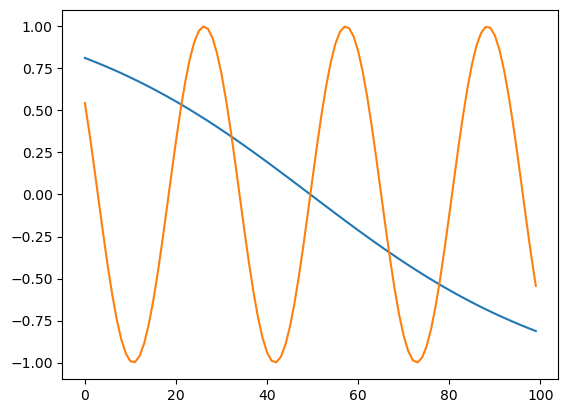

In [11]:
u_pred_NN = PINN.forward(x).cpu().detach().numpy()
plt.plot(PINN.forward(x).cpu().detach().numpy())
plt.plot(u_true.cpu().detach().numpy())

In [5]:
class Sequentialmodel(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 

    
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) 
            
        a = self.linears[-1](a) 
         
        return a 
    
    def loss_PDE(self,x_coll,f_hat):
        g = x_coll.clone()             
        g.requires_grad = True
  
        u = self.forward(g) 

        u_x = autograd.grad(u,g,torch.ones([x_coll.shape[0], 1]).to(device), retain_graph=True, create_graph=True,allow_unused = True)[0]
        
        du_dx = u_x[:,[0]]
        
        f = du_dx -10*torch.cos(10*x)
        
        loss = self.loss_function(f,f_hat)
        
        return loss


    def loss(self,x_coll,f_hat,x_train,u_train):
        loss_bc = self.loss_function(self.forward(x_train.reshape(-1,1)),u_train.reshape(-1,1))
        loss_f = self.loss_PDE(x_coll,f_hat)
        
        return loss_bc + loss_f

In [6]:
x = torch.from_numpy(np.linspace(-1,1,100).reshape(-1,1)).float().to(device)
ub = np.array([1.0])
lb = np.array([-1.0])

layers = np.array([1,5,5,1]) #9 hidden layers

x_coll = x

u_true = torch.sin(10*x)
f_hat = torch.zeros((100,1),device= device)

PINN = Sequentialmodel(layers)
PINN.to(device)

torch.manual_seed(1234)
        
optimizer = optim.Adam(PINN.parameters(), lr=0.08)        
        
for i in range(10000):
    optimizer.zero_grad()     # zeroes the gradient buffers of all parameters
    loss = PINN.loss(x_coll,f_hat,x[50],u_true[50])
    loss.backward() #backprop
    optimizer.step()
    
    if(i%100==0):
        loss_np = PINN.loss(x_coll,f_hat,x[0],u_true[0]).cpu().detach().numpy()
        print(i,"Train Loss",loss_np)
loss_np = PINN.loss(x_coll,f_hat,x[0],u_true[0]).cpu().detach().numpy()
print(i,"Train Loss",loss_np)

0 Train Loss 52.347836
100 Train Loss 25.476048
200 Train Loss 25.125341
300 Train Loss 24.96413
400 Train Loss 24.843271
500 Train Loss 24.76628
600 Train Loss 24.729427
700 Train Loss 24.676613
800 Train Loss 19.789774
900 Train Loss 15.898662
1000 Train Loss 15.914846
1100 Train Loss 15.9103365
1200 Train Loss 15.811343
1300 Train Loss 15.816617
1400 Train Loss 15.797103
1500 Train Loss 15.831056
1600 Train Loss 15.777736
1700 Train Loss 15.760023
1800 Train Loss 15.808249
1900 Train Loss 15.904474
2000 Train Loss 15.769572
2100 Train Loss 15.912207
2200 Train Loss 15.738571
2300 Train Loss 15.75675
2400 Train Loss 15.729415
2500 Train Loss 15.7853985
2600 Train Loss 15.72344
2700 Train Loss 15.721127
2800 Train Loss 15.718948
2900 Train Loss 15.718504
3000 Train Loss 15.715954
3100 Train Loss 15.739184
3200 Train Loss 15.801102
3300 Train Loss 16.631027
3400 Train Loss 15.702926
3500 Train Loss 15.811782
3600 Train Loss 15.715299
3700 Train Loss 15.699131
3800 Train Loss 15.747262


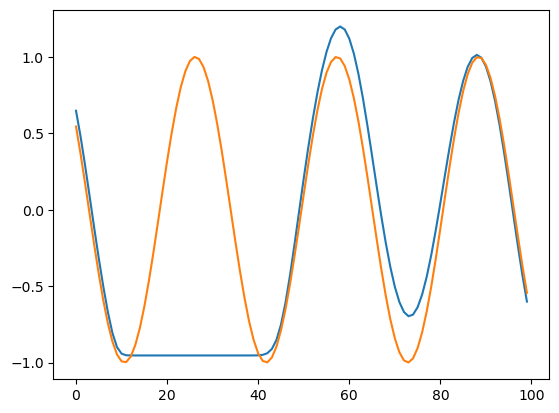

In [7]:
u_pred_PINN1 = PINN.forward(x).cpu().detach().numpy()
plt.plot(PINN.forward(x).cpu().detach().numpy())
plt.plot(u_true.cpu().detach().numpy())

In [8]:
class Sequentialmodel(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
    
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data) 

    
    'forward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = 2.0*(x - l_b)/(u_b - l_b) - 1.0 #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) + z
            
        a = self.linears[-1](a) 
         
        return a 
    
    def loss_PDE(self,x_coll,f_hat):
        g = x_coll.clone()             
        g.requires_grad = True
  
        u = self.forward(g) 

        u_x = autograd.grad(u,g,torch.ones([x_coll.shape[0], 1]).to(device), retain_graph=True, create_graph=True,allow_unused = True)[0]
        
        du_dx = u_x[:,[0]]
        
        f = du_dx -10*torch.cos(10*x)
        
        loss = self.loss_function(f,f_hat)
        
        return loss


    def loss(self,x_coll,f_hat,x_train,u_train):
        loss_bc = self.loss_function(self.forward(x_train.reshape(-1,1)),u_train.reshape(-1,1))
        loss_f = self.loss_PDE(x_coll,f_hat)
        
        return loss_bc + loss_f

In [9]:
x = torch.from_numpy(np.linspace(-1,1,100).reshape(-1,1)).float().to(device)
ub = np.array([1.0])
lb = np.array([-1.0])

layers = np.array([1,5,5,1]) #9 hidden layers

x_coll = x

u_true = torch.sin(10*x)
f_hat = torch.zeros((100,1),device= device)

PINN = Sequentialmodel(layers)
PINN.to(device)

torch.manual_seed(1234)
        
optimizer = optim.Adam(PINN.parameters(), lr=0.08)        
        
for i in range(10000):
    optimizer.zero_grad()     # zeroes the gradient buffers of all parameters
    loss = PINN.loss(x_coll,f_hat,x[50],u_true[50])
    loss.backward() #backprop
    optimizer.step()
    
    if(i%100==0):
        loss_np = PINN.loss(x_coll,f_hat,x[0],u_true[0]).cpu().detach().numpy()
        print(i,"Train Loss",loss_np)
loss_np = PINN.loss(x_coll,f_hat,x[0],u_true[0]).cpu().detach().numpy()
print(i,"Train Loss",loss_np)

0 Train Loss 54.299698
100 Train Loss 51.919975
200 Train Loss 30.415796
300 Train Loss 25.716267
400 Train Loss 4.897874
500 Train Loss 0.19588643
600 Train Loss 1.4604626
700 Train Loss 0.0364965
800 Train Loss 0.08261496
900 Train Loss 0.032593433
1000 Train Loss 1.44132
1100 Train Loss 0.039875135
1200 Train Loss 0.031547304
1300 Train Loss 0.026019037
1400 Train Loss 0.057615243
1500 Train Loss 0.033954393
1600 Train Loss 0.027062349
1700 Train Loss 0.028333161
1800 Train Loss 0.045317493
1900 Train Loss 0.031424638
2000 Train Loss 0.024535578
2100 Train Loss 0.019742187
2200 Train Loss 0.056634214
2300 Train Loss 0.027842907
2400 Train Loss 0.021960063
2500 Train Loss 0.01944774
2600 Train Loss 0.041636895
2700 Train Loss 0.027940115
2800 Train Loss 0.022388743
2900 Train Loss 0.01877745
3000 Train Loss 0.036162492
3100 Train Loss 0.024593662
3200 Train Loss 0.02015154
3300 Train Loss 0.58473206
3400 Train Loss 0.03310306
3500 Train Loss 0.02461668
3600 Train Loss 0.020112598
370

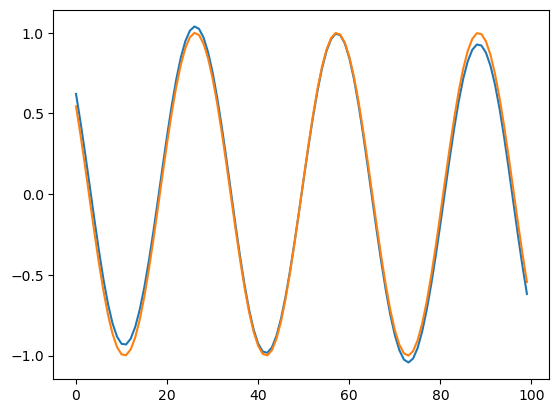

In [10]:
u_pred_PINN2 = PINN.forward(x).cpu().detach().numpy()
plt.plot(PINN.forward(x).cpu().detach().numpy())
plt.plot(u_true.cpu().detach().numpy())

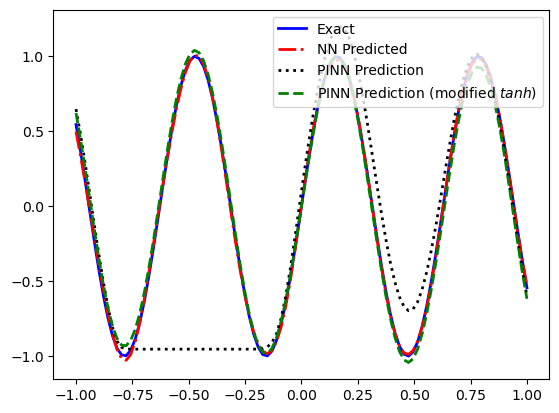

In [37]:
fig,ax = plt.subplots(1,1)
#x = x.cpu().detach().numpy()
ax.plot(x,u_true,'b',linewidth = 2,label = "Exact")
ax.plot(x,u_pred_NN,'r-.',linewidth = 2,label = "NN Predicted")
ax.plot(x,u_pred_PINN1,'k:',linewidth = 2,label = "PINN Prediction")
ax.plot(x,u_pred_PINN2,'g--',linewidth = 2,label = "PINN Prediction (modified $tanh$)")

ax.legend(loc = 'upper right')

fig.savefig('theory_ex1.pdf', format='pdf', bbox_inches='tight')

In [35]:
np.mean(np.square(u_pred_PINN2 - u_true.cpu().detach().numpy()))

0.0024011724